<a href="https://colab.research.google.com/github/vsilchev/hse-time-series/blob/master/Hurst_Exponent_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R/S Анализ и Показатель Хёрста

## Теория

Пусть есть временной ряд из $N$ наблюдений:

$$ \{X_i\} = (X_1, X_2, \dots, X_N) $$

1. Временной ряд разбивается на $K$ смежных отрезков длиной $n$. Обозначим каждый из отрезков $\{X_{a,j}\}$, где $a=1, 2, \dots, K$

$$
\{X_i\} \to \{X_{1,j}\}, \{X_{2,j}\}, \dots, \{X_{K,j}\} \\
\{X_{a,j}\} = (X_{a,1}, X_{a,2}, \dots, X_{a,n})  = (X_{n(a-1)+1}, X_{n(a-1)+2},\dots,X_{an})
$$

2. Для каждого отрезка рассчитывается среднее значение:

$$ m_a = \frac{1}{n} \sum_{j=1}^n X_{a,j}$$

3. Для каждого отрезка рассчитываются отклонения от среднего значения в этом отрезке:

$$ \{Y_{a,j}\}: \quad Y_{a,j} = X_{a,j} - m_a,\quad j = 1, 2, \dots, n $$

4. Ряд первых накопленных отклонений:

$$ Z_{a,j} = \sum_{t=1}^j Y_{a,t} $$

5. Размах накопленных отклонений ($R$) и Стандартное отклонение ($S$):

$$
R_a = \max \left(Z_{a,1},Z_{a,2},\dots ,Z_{a,n}\right)-\min \left(Z_{a,1},Z_{a,2},\dots ,Z_{a,n}\right) \\
S_a = \sqrt{\frac{1}{n} \sum_{j=1}^n \left(Y_{a,j}\right)^2}
$$

6. Среднее значение R/S (Rescaled Range) по всем отрезками для выбранной длины $n$:

$$ RS_n = \operatorname {E} \left[ R_a/S_a \right]$$

7. Увеличиваем $n$ и повторяем шаги 2-6.

Нас интересует зависимость $RS_n$ от $n$ в двойном логарифмическом масштабе. Иными словами,

$$ RS_n \sim n^H$$

где $H$ - показатель Хёрста.

Последовательности, для которых $H > 0.5$, считаются персистентными — они сохраняют имеющуюся тенденцию, то есть возрастание в прошлом более вероятно приводит к возрастанию в дальнейшем, и наоборот. При значении $0.5$ явной тенденции не выражено, а при меньших значениях процесс характеризуется антиперсистентностью — любая тенденция стремится смениться противоположной.

## Практика

Библиотеки:

* [nolds](https://nolds.readthedocs.io/en/latest/index.html) - "NOnLinear measures for Dynamical Systems"
* numpy
* pandas
* pyplot from matplotlib
* seaborn



In [1]:
!pip install nolds

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nolds

sns.set(style='ticks', palette='Set2')
rng = np.random.default_rng() # modern way to generate random values in numpy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Белый шум

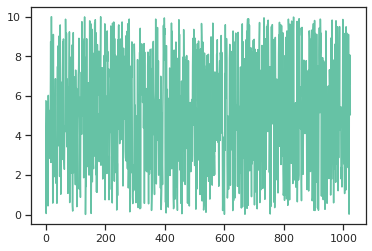

In [3]:
white_noize_ts = rng.uniform(0, 10, np.power(2, 10))
plt.plot(white_noize_ts)

In [4]:
print("Hurst exponent for this White Noize sample: {}".format(nolds.hurst_rs(white_noize_ts)))

Hurst exponent for this White Noize sample: 0.5126191386517228


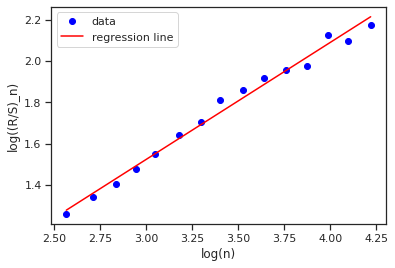

0.5654134090448686


In [5]:
(H_wn, debug_data) = nolds.hurst_rs(white_noize_ts, fit='poly', corrected=False, debug_data=True, debug_plot=True)
print(H_wn)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


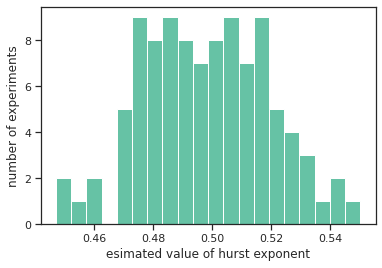

In [6]:
# nolds.examples.plot_hurst_hist()
hs = [nolds.hurst_rs(rng.random(size=10000)) for _ in range(100)]
plt.hist(hs, bins=20)
plt.xlabel("esimated value of hurst exponent")
plt.ylabel("number of experiments")
plt.show()

### Броуновское движение

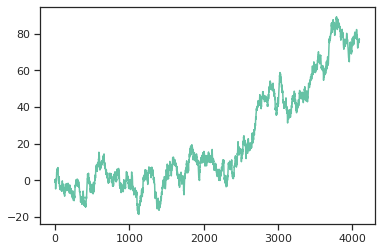

In [7]:
brownian_motion_ts = np.cumsum(rng.normal(size=np.power(2, 12)))
plt.plot(brownian_motion_ts)

In [8]:
print("Hurst exponent for this Brownian motion sample: {}".format(nolds.hurst_rs(brownian_motion_ts)))

Hurst exponent for this Brownian motion sample: 0.9398228549821629


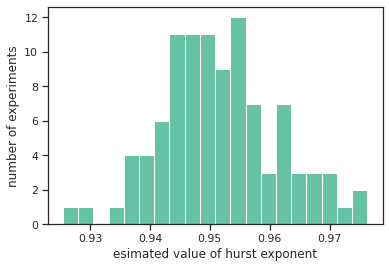

In [9]:
bw_hs = [nolds.hurst_rs(np.cumsum(rng.normal(size=10000))) for _ in range(100)]
plt.hist(bw_hs, bins=20)
plt.xlabel("esimated value of hurst exponent")
plt.ylabel("number of experiments")
plt.show()

### Обменный курс Евро к Доллару США

источник: [Официальный сайт ФРС США](https://www.federalreserve.gov/datadownload/Choose.aspx?rel=H10)

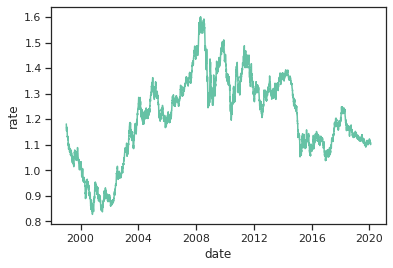

In [10]:
EurUsd_ts = pd.read_csv("https://raw.githubusercontent.com/vsilchev/hse-time-series/master/FRB_H10_EURUSD.csv",
                        parse_dates=['date'],
                        na_values='ND'
                        ).fillna(method='bfill')
sns.lineplot(x='date', y='rate', data=EurUsd_ts)

In [11]:
print("Hurst exponent for EUR/USD exchange rates: {}".format(nolds.hurst_rs(EurUsd_ts['rate'])))

Hurst exponent for EUR/USD exchange rates: 0.9637984970792354
